In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataset=pd.read_csv('/Users/eupirate/Documents/DA_L7/L7_term3/L7_term3_MLAds_CTR.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
#Step 1: At each round "n" we consider two numbers for each ad i
#Ni(n) = the number of times the ad i was selected up to round n
#Ri(n) = the sum of rewards of the ad i up to round n

N = 1000 #number of users
d = 10 #number of ads
ads_selected = []
numbers_of_selections = [0] * d #we use here only the observations that contain 0 #Ni(n)
sums_of_rewards = [0] * d #sum of rewards for each of the variables #Ri(n)
total_reward = 0 #total reward accumulated during the time that we are working. It starts from 0 because nothing happen
                #at the momento zero, when we begin the process
#Step 2: We create a for loop from 0 up to round 10k (N) and in each round, we will see the average reward of ad i up to round n

#We also here create the confidence interval to select the ad with the highest UCB.
for n in range(0, N): #n is the variable name because they are the rounds
    ad = 0 #we start from the first ad (index is 0)
    max_upper_bound = 0 #we create the variable max ucb 
    for i in range(0, d): #second loop will iterate the ads (results from 1 to 10)
        if (numbers_of_selections[i] > 0): # if it is larger than 0, the add was selected at least once
            average_reward = sums_of_rewards[i] / numbers_of_selections[i] #r bar is an average of rewards
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]) # we build here the CI
            upper_bound = average_reward + delta_i #last calculation: rbar + delta(n)
        else:
            upper_bound = 1e400 #we set a super high value for the confidence
        if upper_bound > max_upper_bound: #if the upper band is larger than the max upper bound we set
            max_upper_bound = upper_bound # we update the max upper bound value
            ad = i #this is the value that we are using at the beginning of the loop
            
    #We go now to the first for loop of this second step to complete the model
    
    ads_selected.append(ad) #this is the full list of all the ads selected
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #we modify the number of selections created in the loop
    reward = dataset.values[n, ad] #we count the rewards from the dataset 
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward # we update the sum of rewards, and the rewards is in the dataset
    total_reward = total_reward + reward #we modify the total reward and add the reward variable in the end

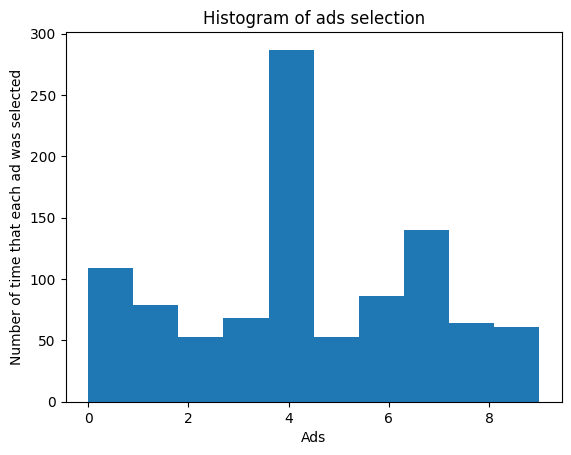

In [4]:
#We visualise the results

plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of time that each ad was selected')
plt.show()